# Matplotlib Boxplots

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] =='Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

22279      57500.0
624473    146000.0
19900      95000.0
527276    145000.0
582259     85000.0
99209      51500.0
441391     90000.0
236163    138500.0
240974     65000.0
458412     77338.5
Name: salary_year_avg, dtype: float64

<Axes: >

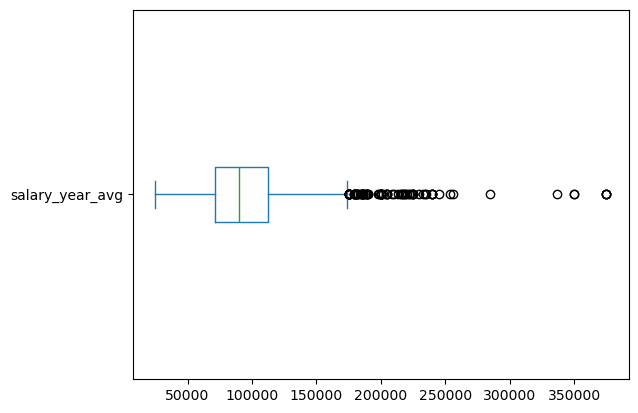

In [6]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

C:\Users\rbrod\AppData\Local\Temp\ipykernel_43312\2865990902.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


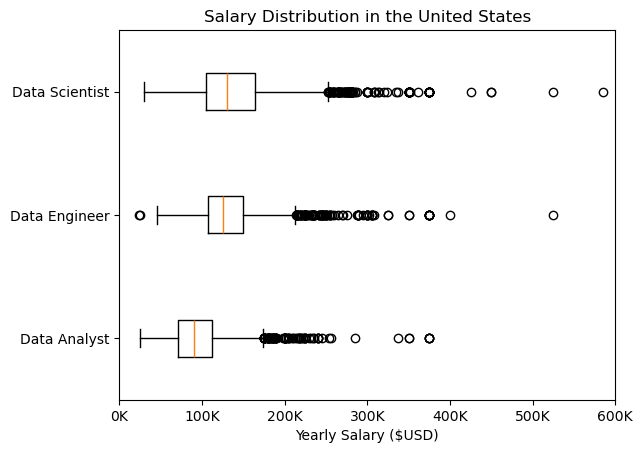

In [14]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job]['salary_year_avg'] for job in job_titles]


plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.xlim(0, 600_000)
plt.show()

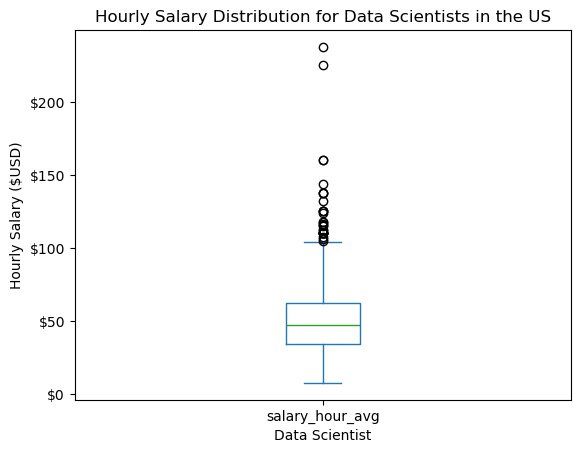

In [21]:
# Only get data analyst jobs in the US
df_DS_US = df[(df['job_title_short'] =='Data Scientist') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DS_US = df_DS_US.dropna(subset=['salary_hour_avg'])

df_DS_US['salary_hour_avg'].plot(kind='box')

plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Hourly Salary Distribution for Data Scientists in the US')
ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${y:,.0f}'))


plt.show()

C:\Users\rbrod\AppData\Local\Temp\ipykernel_43312\907968295.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_list, labels=countries)


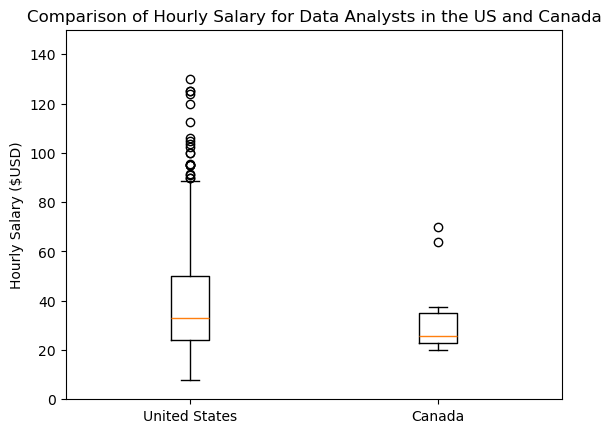

In [25]:
countries = ['United States', 'Canada']

df_DAUSC = df[(df['job_country'].isin(countries)) & (df['job_title_short'] == 'Data Analyst')].copy()

df_DAUSC = df_DAUSC.dropna(subset=['salary_hour_avg'])

country_list = [df_DAUSC[df_DAUSC['job_country'] == country]['salary_hour_avg'] for country in countries]


plt.boxplot(country_list, labels=countries)
plt.title('Comparison of Hourly Salary for Data Analysts in the US and Canada')
plt.ylabel('Hourly Salary ($USD)')

plt.ylim(0, 150)
plt.show()

C:\Users\rbrod\AppData\Local\Temp\ipykernel_43312\3064022153.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(job_list, labels=job_titles)


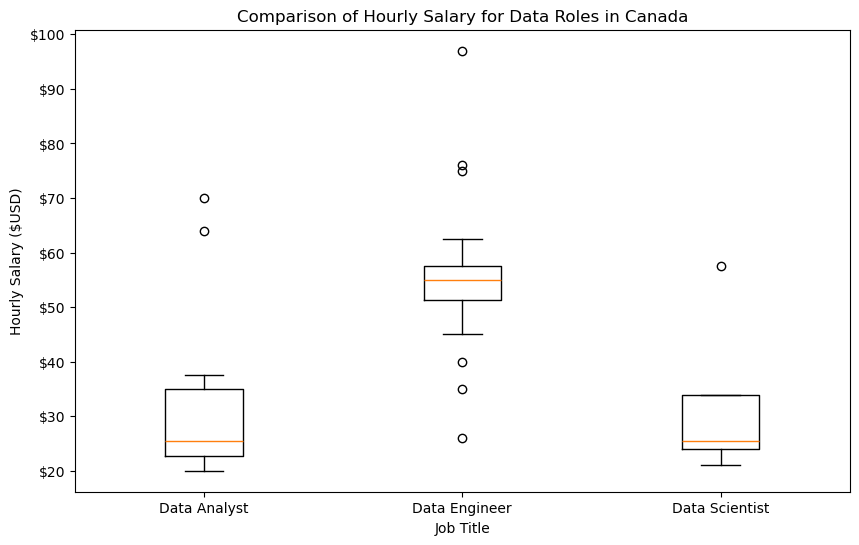

In [31]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_CA = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].copy()

df_CA = df_CA.dropna(subset=['salary_hour_avg'])

job_list = [df_CA[df_CA['job_title_short'] == job]['salary_hour_avg'] for job in job_titles]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(job_list, labels=job_titles)
ax.set_title('Comparison of Hourly Salary for Data Roles in Canada')
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary ($USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y)}'))

plt.show()